# Web scraping

**Author:** Ties de Kok ([Personal Website](www.tiesdekok.com]))  
**Last updated:** 2 Oct 2017  
**Python version:** Python 3.5  
**License:** MIT License  

## <i>Introduction</i>

Depending on the website it can be very easy or very hard to extract the information you need.  

Websites can be classified into roughly two categories:
1. Computer oriented webpage: API (Application Program Interface)
2. Human oriented webpage: regular website

Option 1 (an API) is designed to be approach programmatically so extracting the data you need is usually easy. However, in many cases you don't have an API available so you might have to resort to scraping the regular website (option 2). 

It is worth noting that option 2 can put a lot of strain on the server of the website. Therefore, only resort to option 2 if there is no API available, and if you decide to scrape the regular website make sure to do so in a way that is as polite as possible!

**This notebook is structured as follows:**

1. Using the `requests` package to interact with a website or API
2. Extract data using an API
3. Extract data from a regular website using regular expressions
4. Extract data from a regular website by parsing it using LXML
5. Extract data from Javascript heavy websites using Selenium
6. Advanced webscraping using Scrapy

**Note 1:** In this notebook I will often build upon chapter 11 of 'automate the boring stuff' which is available here:  
https://automatetheboringstuff.com/chapter11/

**Note 2:** In this notebook I focus primarily on extracting information from webpages (i.e. `web scraping`) and very little on programming a bot to automatically traverse the web (i.e. `web crawling`).

**Note 3:** I recommend reading this blog post on the legality of web scraping/crawling:  
https://benbernardblog.com/web-scraping-and-crawling-are-perfectly-legal-right/

## <span style="text-decoration: underline;">Requests package</span>

We will use the `requests` module. I like the description mentioned in the book 'automate the boring stuff':
> The requests module lets you easily download files from the Web without having to worry about complicated issues such as network errors, connection problems, and data compression. The requests module doesn’t come with Python, so you’ll have to install it first. **From the command line, run:**   

> `pip install requests`

In [1]:
import requests

*Note:* If you google around on webscraping with Python you will probably also find mentions of the `urllib2` package. I highly recommend to use `requests` as it will make your life a lot easier for most tasks. 

### Basics of  the `requests` package

The `requests` package takes a URL and allows you to interact with the contents. For example:

In [2]:
res = requests.get('https://automatetheboringstuff.com/files/rj.txt')

In [3]:
print(res.text[7:250])

Project Gutenberg EBook of Romeo and Juliet, by William Shakespeare

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project


The `requests` package is incredibly useful because it deals with a lot of connection related issues automatically. We can for example check whether the webpage returned any errors relatively easily:

In [4]:
res.status_code 

200

In [5]:
requests.get('https://automatetheboringstuff.com/thisdoesnotexist.txt').status_code

404

You can find a list of most common HTTP Status Codes here:  
https://www.smartlabsoftware.com/ref/http-status-codes.htm

## <span style="text-decoration: underline;">Extract data using an API</span>

APIs are designed to be approached and 'read' by computers, whereas regular webpages are designed for humans not computers.  

An API, in a simplified sense, has two characteristics:
1. A request is made using an URL that contains parameters specifiying the information requested
2. A response by the server in a machine-readable format. 

The machine-readable formats are usually either:
- JSON
- XML
- (sometimes plain text)

### Demonstration using an example

Let's say, for the sake of an example, that we are interested in retrieving current and historical Bitcoin prices.  

After a quick Google search we find that this information is available on https://www.coindesk.com/price/.

We could go about and scrape this webpage directly, but as a responble web-scraper you look around and notice that coindesk fortunately offers an API that we can use to retrieve the information that we need. The details of the API are here:

https://www.coindesk.com/api/

There appear to be two API calls that we are interested in:

1) We can retrieve the current bitcoin price using: https://api.coindesk.com/v1/bpi/currentprice.json  
2) We can retrieve historical bitcoin prices using: https://api.coindesk.com/v1/bpi/historical/close.json

Clicking on either of these links will show the response of the server. If you click the first link it will look something like this:

![](https://i.imgur.com/CpzgsTo.png)

Not very readable for humans, but easily processed by a machine!



###  Task 1: get the current Bitcoin price

As discussed above, we can retrieve the current Bitcoin price by "opening" the following URL:  
https://api.coindesk.com/v1/bpi/currentprice.json

Using the `requests` library we can easily "open" this url and retrieve the response.

In [6]:
res = requests.get('https://api.coindesk.com/v1/bpi/currentprice.json')

An important observation is that this API returns information in the so-called `JSON` format.  

You can learn more about the JSON format here: https://www.w3schools.com/js/js_json_syntax.asp.

We could, as before, return this results as plain text:

In [7]:
text_res = res.text
text_res

'{"time":{"updated":"Oct 4, 2017 13:56:00 UTC","updatedISO":"2017-10-04T13:56:00+00:00","updateduk":"Oct 4, 2017 at 14:56 BST"},"disclaimer":"This data was produced from the CoinDesk Bitcoin Price Index (USD). Non-USD currency data converted using hourly conversion rate from openexchangerates.org","chartName":"Bitcoin","bpi":{"USD":{"code":"USD","symbol":"&#36;","rate":"4,216.6225","description":"United States Dollar","rate_float":4216.6225},"GBP":{"code":"GBP","symbol":"&pound;","rate":"3,177.1281","description":"British Pound Sterling","rate_float":3177.1281},"EUR":{"code":"EUR","symbol":"&euro;","rate":"3,581.9154","description":"Euro","rate_float":3581.9154}}}'

This is, however, not desirable because we want see the prices that we want but we have no way of easily and reliably extract these prices from the string.

We can, however, achieve this by telling `requests` that the response is in the JSON format:

In [8]:
json_res = res.json()
json_res

{'bpi': {'EUR': {'code': 'EUR',
   'description': 'Euro',
   'rate': '3,581.9154',
   'rate_float': 3581.9154,
   'symbol': '&euro;'},
  'GBP': {'code': 'GBP',
   'description': 'British Pound Sterling',
   'rate': '3,177.1281',
   'rate_float': 3177.1281,
   'symbol': '&pound;'},
  'USD': {'code': 'USD',
   'description': 'United States Dollar',
   'rate': '4,216.6225',
   'rate_float': 4216.6225,
   'symbol': '&#36;'}},
 'chartName': 'Bitcoin',
 'disclaimer': 'This data was produced from the CoinDesk Bitcoin Price Index (USD). Non-USD currency data converted using hourly conversion rate from openexchangerates.org',
 'time': {'updated': 'Oct 4, 2017 13:56:00 UTC',
  'updatedISO': '2017-10-04T13:56:00+00:00',
  'updateduk': 'Oct 4, 2017 at 14:56 BST'}}

All that is left now is to extract the Bitcoin prices. This is now easy because `res.json()` returns a Python dictionary.

In [9]:
json_res['bpi']['EUR']

{'code': 'EUR',
 'description': 'Euro',
 'rate': '3,581.9154',
 'rate_float': 3581.9154,
 'symbol': '&euro;'}

In [10]:
json_res['bpi']['EUR']['rate']

'3,581.9154'

### Task 2: write a function to retrieve historical Bitcoin prices

We can retrieve historical Bitcoin prices through the following API URL:  
https://api.coindesk.com/v1/bpi/historical/close.json

Looking at https://www.coindesk.com/api/ tells us that we can pass the following parameters to this URL:  
* `index` -> to specify the index
* `currency` -> to specify the currency 
* `start` -> to specify the start date of the interval
* `end` -> to specify the end date of the interval 

We are primarily interested in the `start` and `end` parameter.

As illustrated in the example, if we want to get the prices between 2013-09-01 and 2013-09-05 we would construct our URL as such:

https://api.coindesk.com/v1/bpi/historical/close.json?start=2013-09-01&end=2013-09-05

**But how do we do this using Python?**

Fortunately, the `requests` library makes it very easy to pass parameters to a URL as illustrated below.  
For more info, see: http://docs.python-requests.org/en/master/user/quickstart/#passing-parameters-in-urls

In [11]:
API_endpoint = 'https://api.coindesk.com/v1/bpi/historical/close.json'
payload = {'start' : '2013-09-01', 'end' : '2013-09-05'}

In [12]:
res = requests.get(API_endpoint, params=payload)

We can print the resulting URL (for manual inspection for example) using `res.url`:

In [13]:
print(res.url)

https://api.coindesk.com/v1/bpi/historical/close.json?start=2013-09-01&end=2013-09-05


Again, the result is in the JSON format so we can easily process it:

In [14]:
bitcoin_2013 = res.json()

In [15]:
bitcoin_2013['bpi']

{'2013-09-01': 128.2597,
 '2013-09-02': 127.3648,
 '2013-09-03': 127.5915,
 '2013-09-04': 120.5738,
 '2013-09-05': 120.5333}

### Wrap the above into a function

In the example above we hardcode the parameter values (the interval dates), if we want to change the dates we have to manually alter the string values. This is not very convenient, it is easier to wrap everything into a function:

In [16]:
API_endpoint = 'https://api.coindesk.com/v1/bpi/historical/close.json'

def get_bitcoin_prices(start_date, end_date, API_endpoint = API_endpoint):
    payload = {'start' : start_date, 'end' : end_date}
    res = requests.get(API_endpoint, params=payload)
    json_res = res.json()
    return json_res['bpi']

In [17]:
get_bitcoin_prices('2016-01-01', '2016-01-10')

{'2016-01-01': 434.463,
 '2016-01-02': 433.586,
 '2016-01-03': 430.361,
 '2016-01-04': 433.493,
 '2016-01-05': 432.253,
 '2016-01-06': 429.464,
 '2016-01-07': 458.28,
 '2016-01-08': 453.37,
 '2016-01-09': 449.143,
 '2016-01-10': 448.964}

## <span style="text-decoration: underline;">Extract data from a regular website (i.e. webscraping)</span>

In order to extract information from a regular webpage you first have to:  
1. Construct or retrieve the URL
2. Retrieve page returned from URL and put it in memory (usually HTML)

**From here you have a choice:**
    
* Treat the HTML source as text and use regular expression to extract the information.

    *Or*  
    

* Process the HTML using LXML + and extract the information using the native HTML structure

I will discuss both methods below.  

Usually you want to go for the second option (LXML) as it is more robust and less prone to mistakes.  
I would only use the regular expression option if LXML doesn't work or if the task is very small.

## <span style="text-decoration: underline;">Extract data from a regular website using regular expressions</span>

### Regular expressions

Python has a native package to deal with regular expressions, you can import it as such:

In [18]:
import re

## Demonstration

*Reminder:* You usually only want to use regular expressions if you want to do something quick-and-dirty, using LXML is nearly always a better solution!

Let's say our goal is to get the number of abstract views for a particular paper on SSRN:  
For example this one: https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1968579

### Step 1: download the source of the page

In [19]:
ssrn_url = r'https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1968579'
page_source = requests.get(ssrn_url)

### Step 2: convert source to a string (i.e. text)

*Note:* by doing so we essentially ignore the inherent structure of an HTML file, we just treat it as a very large string.

In [20]:
source_text = page_source.text

### Step 3: use a regular expression to extract the number of views

Using the Chrome browser we can, for example, right click on the number and select 'inspect' to bring up this screen:

![](https://i.imgur.com/NcClhwO.png)

Based on this we can construct a regular expression to capture the value that we want.  
Note, we have to account for any spaces, tabs, and newlines otherwise the regular expression will not capture what we want, this can be very tricky.  

Once we have identified the appropriate regular expression (it can help to use tools like www.pythex.org) we can use `re.findall()`:

In [26]:
found_values = re.findall('Abstract Views</div>\r\n\t\t\t<div class="number" title="">(.*?)</div>', source_text)
found_values

['   264,687']

After cleaning the value up a bit (remove spaces and remove comma) we can convert the value to an integral so that Python handles it as a number:

In [32]:
int(found_values[0].strip().replace(',', ''))

264687

**As you can see, regular expression are rarely convenient for web scraping and if possible should be avoided!**

## <span style="text-decoration: underline;">Extract data from a regular website by parsing it using LXML</span>

In the example above we treat a HTML page as plain-text and ignore the inherent format of HTML.  
A better alternative is to utilize the inherent structure of HTML to extract the information that we need. 

A quick refresher on HTML from 'automate the boring stuff':

> In case it’s been a while since you’ve looked at any HTML, here’s a quick overview of the basics. An HTML file is a plaintext file with the .html file extension. The text in these files is surrounded by tags, which are words enclosed in angle brackets. The tags tell the browser how to format the web page. A starting tag and closing tag can enclose some text to form an element. The text (or inner HTML) is the content between the starting and closing tags. For example, the following HTML will display Hello world! in the browser, with Hello in bold:

    <strong>Hello</strong> world!

You can view the HTML source by right-clicking a page and selecting `view page source`:
![](https://automatetheboringstuff.com/images/000009.jpg)

### Get started

We will use the so-called `LXML` module to parse HTML pages. You first need to install it using the command line:

    pip install lxml
    
You can find the documentation for `LXML` here: http://lxml.de/
    
*Note:* an alternative to LXML is Beautifulsoup but nowadays (in my experience) it is better to use LXML.

In [33]:
import lxml

### Parse the HTML

For this example we will follow 'automate the boring stuff' and retrieve data from:  
http://nostarch.com

In [63]:
res = requests.get('http://nostarch.com')
noStarchSoup = bs4.BeautifulSoup(res.text)
type(noStarchSoup)

bs4.BeautifulSoup

### Retrieve information from the BeautifulSoup object

The goal is to, somehow, retrieve the content of a particular section of the HTML document.  
Now, HTML is like a hierarchical structure, so we can try to select a particular part based on the location in the structure.  

There are two ways to go about this:  
1. Using a `css-selector`
2. Using an `XPath`

BeautifulSoup accepts a `css-selector` expression for the `select()` method.  

I will not go into much detail on these `css-selectors` but this links lists several tutorials:  
https://automatetheboringstuff.com/list-of-css-selector-tutorials/

### A pragmatic way to go about making CSS selectors

Creating CSS selectors manually can be a lot of work and require some knowledge on how HTML and CSS works.  
However, there are tools available that allow you to select what you want and have it generate a CSS selector expression.  

For example, if you use Chrome you can use the `SelectorGadget` extension.  
This extension allows you to select what you want and do not want, and it will generate an expression you can use with BeautifulSoup.

### For example:
Let's say we want to extract the title of the first element in the 'New' column:

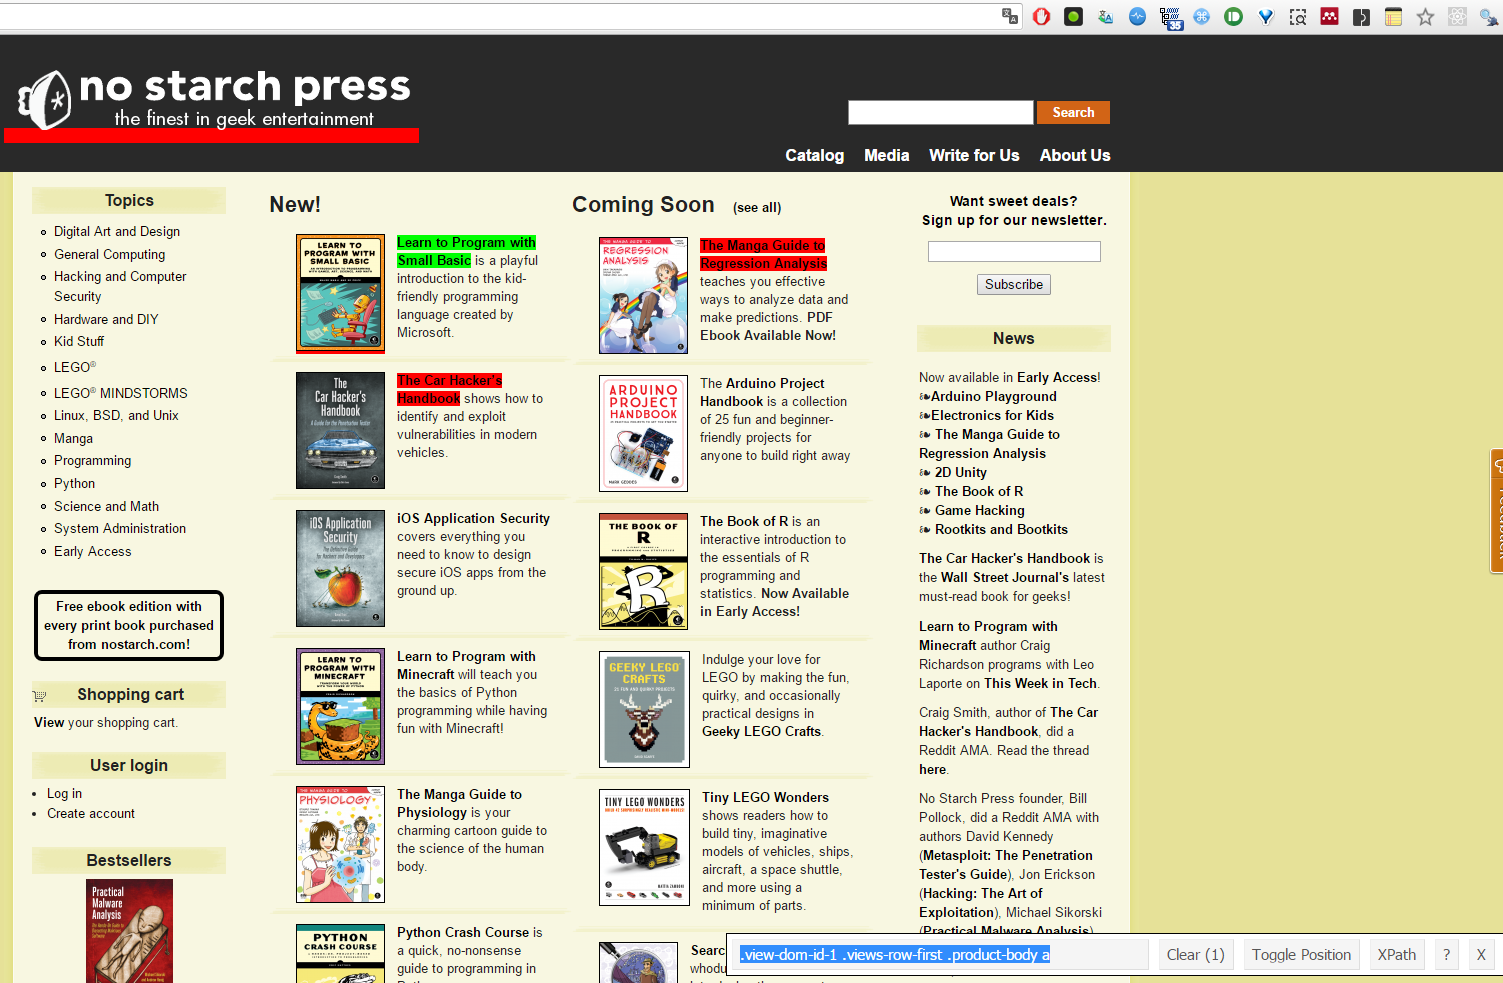

In [72]:
Image('https://dl.dropboxusercontent.com/u/1265025/python_tut/python_css.PNG')

*Note:* The number between brackets after 'Clear' indicates the number of elements selected.

### Extract the text from that one element

In [73]:
first_new = noStarchSoup.select('.view-dom-id-1 .views-row-first .product-body a')

In [76]:
first_new[0].getText()

u'Learn to Program with Small Basic'

In [77]:
first_new[0].attrs

{'href': 'https://www.nostarch.com/smallbasic'}

### Extract all the new elements

In [78]:
all_new = noStarchSoup.select('.view-dom-id-1 .product-body a')

In [79]:
for x in all_new:
    print(x.getText())

Learn to Program with Small Basic
The Car Hacker’s Handbook
iOS Application Security
Learn to Program with Minecraft
The Manga Guide to Physiology
Python Crash Course
The Official ScratchJr Book
The Maker's Guide to the Zombie Apocalypse
Clojure for the Brave and True
Junkyard Jam Band
Python Playground
 The LEGO Power Functions Idea Book, Vol. 1
The LEGO Architect
The LEGO Adventure Book, Volume 3
Beautiful LEGO: Wild!
The Art of LEGO Scale Modeling


### Extract bestsellers

In [80]:
all_bestsellers = noStarchSoup.select('.imagecache-product_linked .imagecache-product')

In [93]:
all_bestsellers[0].attrs

{'alt': 'Practical Malware Analysis',
 'class': ['imagecache', 'imagecache-product'],
 'height': '115',
 'src': 'https://www.nostarch.com/sites/default/files/imagecache/product/practical_malware_analysis.png',
 'title': 'Practical Malware Analysis',
 'width': '87'}

In [95]:
for x in all_bestsellers:
    print(x.attrs['title'])

Practical Malware Analysis
The LEGO Neighborhood Book
Super Scratch Programming Adventure! 
Teach Your Kids to Code



## <span style="text-decoration: underline;">Extract data from Javascript heavy websites using Selenium</span>

## <span style="text-decoration: underline;">Advanced webscraping using Scrapy</span>

In the examples above we provide the URLs in advance.  
Sometimes you want to create a `spider` which basically 'walks' through webpages and crawls the information.  

In other words, you might want to create a spider that visits webpages without specifying all the URLs upfront.  

This, obviously, requires more programming but it can be achieved with frameworks such as `Scrapy`.  
http://scrapy.org/

Using this framework requires some more time investment, but if you are serious about web-crawling this is the way to go.  
`Scrapy` also allows 'spiders' to click on links or use login forms, amongst many other things.

## Advanced webscraping using Selenium

Sometimes you need to interact with a webpage in a way that is not achievable by using URLs.  
For example, you might need to first login before being able to reach a web-page.  

In many cases you can use the `scrapy` framework but an alternative that sometimes works better is the `selenium` Module:

> The selenium module lets Python directly control the browser by programmatically clicking links and filling in login information, almost as though there is a human user interacting with the page. Selenium allows you to interact with web pages in a much more advanced way than Requests and Beautiful Soup; but because it launches a web browser, it is a bit slower and hard to run in the background if, say, you just need to download some files from the Web.

I will not discuss it here, but it is included here:

https://automatetheboringstuff.com/chapter11/ 'Controlling the Browser with the selenium Module'